In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
url = r'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)

In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data = titanic.drop(titanic.columns[[0,1,3,8,10,11]], axis=1)
data = pd.concat([data,titanic['Survived']], axis = 1)

In [5]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [6]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'], dtype='object')

In [7]:
# One hot encoding

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(dtype=np.int64)
temp = encoder.fit_transform(data[['Sex']])

In [8]:
temp = pd.DataFrame(temp.toarray())
temp

,0,1
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [9]:
# replacing the 'Sex' column with the one hot encoded columns

data.insert(2,'male',temp.iloc[:,-1])
data.insert(3,'female',temp.iloc[:,:1])
data.drop('Sex', axis=1, inplace= True)

In [10]:
data

,Pclass,male,female,Age,SibSp,Parch,Fare,Survived
0,3,1,0,22.0,1,0,7.2500,0
1,1,0,1,38.0,1,0,71.2833,1
2,3,0,1,26.0,0,0,7.9250,1
3,1,0,1,35.0,1,0,53.1000,1
4,3,1,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,2,1,0,27.0,0,0,13.0000,0
887,1,0,1,19.0,0,0,30.0000,1
888,3,0,1,NaN,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [11]:
data.isnull().sum()

Pclass        0
male          0
female        0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [12]:
# filling the null values with mean()

for i in data.columns:
    data[i].fillna(value = data[i].mean(), inplace=True)

In [13]:
data.isnull().sum()

Pclass      0
male        0
female      0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

### Let's rebalance this unbalanced Data of Target variable by resampling technique

<AxesSubplot:xlabel='Survived', ylabel='count'>

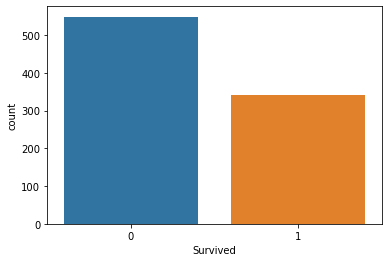

In [14]:
sns.countplot(x = data['Survived'])

In [15]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 

df_majority = data[(data['Survived']==0)] 
df_minority = data[(data['Survived']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= data['Survived'].value_counts().max(), # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [16]:
df_upsampled

,Pclass,male,female,Age,SibSp,Parch,Fare,Survived
288,2,1,0,42.000000,0,0,13.0000,1
697,3,0,1,29.699118,0,0,7.7333,1
298,1,1,0,29.699118,0,0,30.5000,1
208,3,0,1,16.000000,0,0,7.7500,1
483,3,0,1,63.000000,0,0,9.5875,1
...,...,...,...,...,...,...,...,...
884,3,1,0,25.000000,0,0,7.0500,0
885,3,0,1,39.000000,0,5,29.1250,0
886,2,1,0,27.000000,0,0,13.0000,0
888,3,0,1,29.699118,1,2,23.4500,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arun\AppData\Local\Temp\ipykernel_5720\3323397215.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


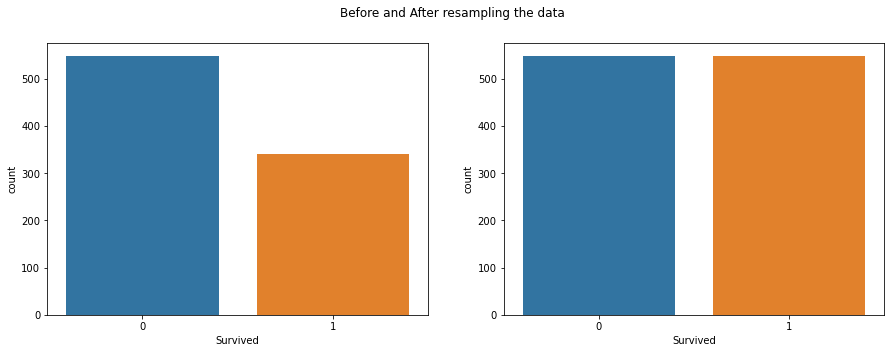

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
 
fig.suptitle('Before and After resampling the data')

sns.countplot(data['Survived'], ax = axes[0])
sns.countplot(df_upsampled['Survived'], ax = axes[1])

fig.show()

### Train Test Split

In [18]:
x = df_upsampled.iloc[:,:-1]
y = df_upsampled.iloc[:,-1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size= 0.3)

In [20]:
X_train.shape, X_test.shape

((768, 7), (330, 7))

### Model training

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf = DecisionTreeClassifier(random_state=0)

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
y_pred = clf.predict(X_test)

### Cross val score without hyperparameter tuning

In [25]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, x, y, cv= 10)

In [26]:
scores.mean()

0.8898331943286072

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       177
           1       0.78      0.92      0.84       153

    accuracy                           0.84       330
   macro avg       0.85      0.85      0.84       330
weighted avg       0.85      0.84      0.84       330



# Hyperparameter Tuning

In [28]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':["gini", "entropy"],
    'max_features':[0.25,0.5,0.75,1.0],
    'min_samples_split':[0.25,0.5,0.75,1.0]
}

In [29]:
reg = GridSearchCV( clf , param_grid = param_grid, cv= 10)

In [30]:
reg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 0.75, 1.0],
                         'min_samples_split': [0.25, 0.5, 0.75, 1.0]})

In [31]:
reg.best_score_

0.7797505126452495

In [32]:
params = reg.best_params_
params

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 0.25,
 'min_samples_split': 0.25}

# Obtaining the Cross Validation Score to check the reliability of the model

In [33]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier( criterion = params.get('criterion'),
                              max_depth = params.get('max_depth'),
                              max_features = params.get('max_features'),
                              min_samples_split = params.get('min_samples_split'),
                              random_state=0)
scores = cross_val_score(clf, x, y, cv=10)

In [34]:
scores.mean()

0.7704670558798999

# Plotting the Decision Tree using the best parameters obtained from GridSearch_CV

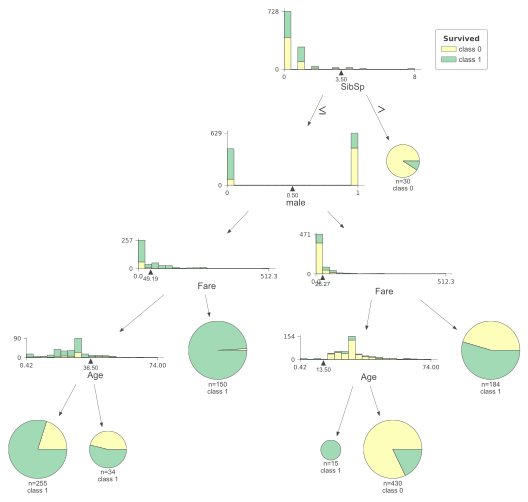

In [35]:
from sklearn import tree
import graphviz.backend as be
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

clf.fit(X_train.values, y_train)

viz = dtreeviz(clf,
              x,
              y,
              target_name = 'Survived',
              feature_names = ['Pclass', 'male', 'female', 'Age', 'SibSp', 'Parch', 'Fare'],
               scale= 1
              )
viz